# Detecção de cores utilizando o algoritmo de Swain & Ballard.

obs: As imagens utilizadas nesse experimento foram retiradas do trabalho de colorometria de Mariana Tricossi.



In [177]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#### Metodo 1.
Utilizamos uma parte da imagem para procurar pela cor dentro da imagem alvo 

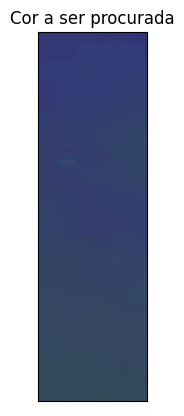

In [178]:
#roi is the object or region of object we need to find
roi = cv.imread('cores/verde.jpeg')
hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)

plt.imshow(hsv)
plt.title("Cor a ser procurada")
plt.xticks([]), plt.yticks([])  
plt.show()

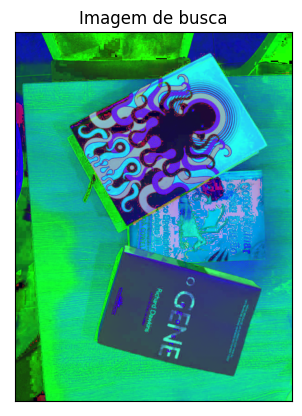

In [179]:
#target is the image we search in
target = cv.imread('cores/livros.jpeg')
hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)

plt.imshow(hsvt)
plt.title("Imagem de busca")
plt.xticks([]), plt.yticks([])  
plt.show()

In [180]:
# Find the histograms using calcHist. Can be done with np.histogram2d also
M = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
I = cv.calcHist([hsvt],[0, 1], None, [180, 256], [0, 180, 0, 256] )

R = M/(I+1)

In [181]:
h,s,v = cv.split(hsvt)
B = R[h.ravel(),s.ravel()]
B = np.minimum(B,1)
B = B.reshape(hsvt.shape[:2])

In [182]:
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(B,-1,disc,B)
B = np.uint8(B)
cv.normalize(B,B,0,255,cv.NORM_MINMAX)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

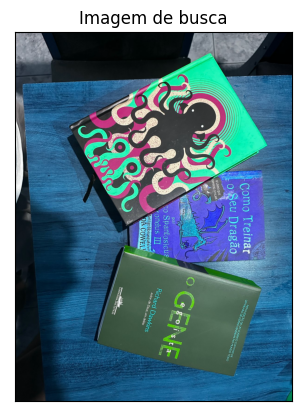

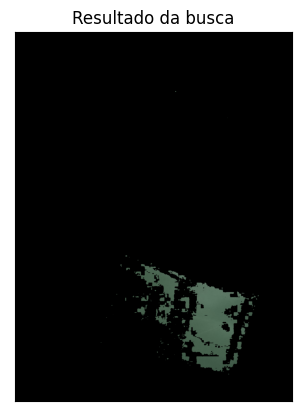

In [183]:
ret,thresh = cv.threshold(B,50,255,0)

thresh = cv.merge((thresh,thresh,thresh))
res = cv.bitwise_and(target,thresh)

plt.imshow(target)
plt.title("Imagem de busca")
plt.xticks([]), plt.yticks([])  
plt.show()

plt.imshow(res)
plt.title("Resultado da busca")
plt.xticks([]), plt.yticks([])  
plt.show()

#### Metodo 2.
Procurar por um range de uma cor na imagem de busca

In [184]:
#define lower and upper ranges for selected color for mask 1
lower_red = np.array([30,40,40])
upper_red = np.array([60,130,150])
mask1 = cv.inRange(hsvt,lower_red,upper_red)

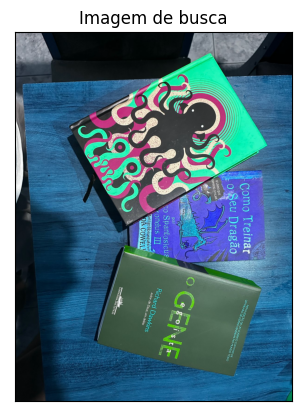

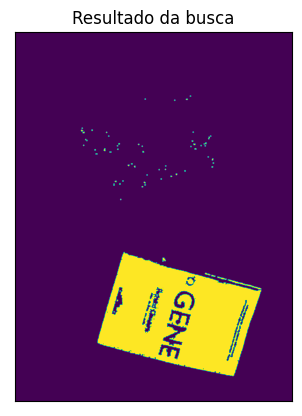

In [185]:
mask1 = cv.morphologyEx(mask1, cv.MORPH_OPEN, np.ones((3,3),np.uint8))
mask1 = cv.morphologyEx(mask1, cv.MORPH_DILATE, np.ones((3,3),np.uint8))

plt.imshow(target)
plt.title("Imagem de busca")
plt.xticks([]), plt.yticks([])  
plt.show()

plt.imshow(mask1)
plt.title("Resultado da busca")
plt.xticks([]), plt.yticks([])  
plt.show()